# Implementing a Neural Network
Simple NN implementation for redhat dataset

In [1]:
# A bit of setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

# Prepare Data


In [2]:
train_df = pd.read_csv('act_train.csv')
people_df = pd.read_csv('people.csv')
merged_df = pd.merge(train_df, people_df, on='people_id')
test_df = pd.read_csv('act_test.csv')

merged_col = merged_df.columns
summary_merged_df = [len(merged_df[col].unique()) for col in merged_col]
print "load complete"

load complete


In [3]:
test_col = test_df.columns
summary_test_df = [len(test_df[col].unique()) for col in test_col]

setA = set(train_df['char_8'])
setB = set(test_df['char_8'])
setA.union(setB) - setA.intersection(setB)

set()

## Convert attributes
- Categorical : type ## / NaN
- Boolean (True False)

In [4]:
#merged_df['char_1_x'].replace({'type':'', ' ':'', np.nan : '0'}, regex = True).astype('int')
#Columns to be converted
merged_df = pd.merge(train_df, people_df, on='people_id')
parsed_col = set(merged_col) - set(['people_id','activity_id','date_x','date_y'])
for col in parsed_col:
    print (col)
    if(type(merged_df[col][0]) is np.bool_):
        print('- is boolean')
        merged_df[col] = merged_df[col].astype('int64')
    elif (type(merged_df[col][0]) is np.int64 or type(merged_df[col][0]) is np.long):
        print('- is integer')
        merged_df[col] = merged_df[col].astype('int64')
    else:
        print('- is type/category')
        merged_df[col] = merged_df[col].replace({'group': '', 'type':'', ' ':'', np.nan : '0'}, regex = True).astype('int64')


group_1
- is type/category
char_12
- is boolean
char_33
- is boolean
char_2_y
- is type/category
activity_category
- is type/category
char_38
- is integer
char_1_y
- is type/category
char_8_y
- is type/category
char_19
- is boolean
char_18
- is boolean
char_17
- is boolean
char_8_x
- is type/category
char_15
- is boolean
char_32
- is boolean
char_9_y
- is type/category
char_9_x
- is type/category
char_11
- is boolean
char_1_x
- is type/category
char_3_y
- is type/category
char_3_x
- is type/category
char_6_y
- is type/category
char_5_y
- is type/category
char_31
- is boolean
outcome
- is integer
char_25
- is boolean
char_10_x
- is type/category
char_10_y
- is boolean
char_30
- is boolean
char_2_x
- is type/category
char_35
- is boolean
char_16
- is boolean
char_26
- is boolean
char_27
- is boolean
char_24
- is boolean
char_14
- is boolean
char_22
- is boolean
char_23
- is boolean
char_20
- is boolean
char_5_x
- is type/category
char_4_x
- is type/category
char_13
- is boolean
char_21
-

In [16]:
merged_test_df = pd.merge(test_df, people_df, on='people_id')
merged_test_col = merged_test_df.columns
parsed_test_col = set(merged_test_col) - set(['people_id','activity_id','date_x','date_y'])
for col in parsed_test_col:
    print (col)
    if(type(merged_test_df[col][0]) is np.bool_):
        print('- is boolean')
        merged_test_df[col] = merged_test_df[col].astype('int64')
    elif (type(merged_test_df[col][0]) is np.int64 or type(merged_test_df[col][0]) is np.long):
        print('- is integer')
        merged_test_df[col] = merged_test_df[col].astype('int64')
    else:
        print('- is type/category')
        merged_test_df[col] = merged_test_df[col].replace({'group': '', 'type':'', ' ':'', np.nan : '0'}, regex = True).astype('int64')

group_1
- is type/category
char_12
- is boolean
char_33
- is boolean
char_2_y
- is type/category
activity_category
- is type/category
char_38
- is integer
char_1_y
- is type/category
char_8_y
- is type/category
char_19
- is boolean
char_18
- is boolean
char_17
- is boolean
char_8_x
- is type/category
char_15
- is boolean
char_32
- is boolean
char_9_y
- is type/category
char_9_x
- is type/category
char_11
- is boolean
char_1_x
- is type/category
char_3_y
- is type/category
char_3_x
- is type/category
char_6_y
- is type/category
char_5_y
- is type/category
char_31
- is boolean
char_25
- is boolean
char_10_x
- is type/category
char_10_y
- is boolean
char_30
- is boolean
char_2_x
- is type/category
char_35
- is boolean
char_16
- is boolean
char_26
- is boolean
char_27
- is boolean
char_24
- is boolean
char_14
- is boolean
char_22
- is boolean
char_23
- is boolean
char_20
- is boolean
char_5_x
- is type/category
char_4_x
- is type/category
char_13
- is boolean
char_21
- is boolean
char_28
-

In [92]:
# y = merged_df['outcome'].values
# tmp = merged_df.drop(['people_id','activity_id','date_x','date_y','outcome'], 1)
# tmp = tmp[['char_33','char_34','char_35','char_36','char_37']]
# print tmp.head(10)
# X = tmp.values[0:10,:]
# print X
# print y
# tmp.head(10)
# y.head(10)

# print 'length of ppl_100 = %d ' % len(check_df)
# print check_df['outcome']
# print check_df.describe()

   char_33  char_34  char_35  char_36  char_37
0        0        1        1        1        0
1        0        1        1        1        0
2        0        1        1        1        0
3        0        1        1        1        0
4        0        1        1        1        0
5        0        1        1        1        0
6        1        1        1        1        0
7        1        1        1        1        0
8        1        1        0        1        1
9        1        1        0        1        1
[[0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [1 1 1 1 0]
 [1 1 0 1 1]
 [1 1 0 1 1]]
[0 0 0 ..., 1 1 1]


In [18]:
# train_dataset = merged_df.drop(['people_id','activity_id','date_x','date_y','outcome'], 1)
# train_outcome = np.array(merged_df.outcome)
# train_mat = np.array(train_dataset, dtype='int')

In [19]:
# train_outcome.shape

(2197291,)

In [20]:
# train_mat.shape

(2197291, 50)

In [6]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

# input_size = 4
# hidden_size = 10
# num_classes = 3
# num_inputs = 5

input_size = 5
hidden_size = 10
num_classes = 2
num_inputs = 10

def init_toy_model():
  np.random.seed(0)
  return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
  np.random.seed(1)
  X = 10 * np.random.randn(num_inputs, input_size)
  y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
  return X, y

net = init_toy_model()
X, y = init_toy_data()
print X
print y

[[ 16.24345364  -6.11756414  -5.28171752 -10.72968622   8.65407629]
 [-23.01538697  17.44811764  -7.61206901   3.19039096  -2.49370375]
 [ 14.62107937 -20.60140709  -3.22417204  -3.84054355  11.33769442]
 [-10.99891267  -1.72428208  -8.77858418   0.42213747   5.82815214]
 [-11.00619177  11.4472371    9.01590721   5.02494339   9.00855949]
 [ -6.83727859  -1.22890226  -9.35769434  -2.6788808    5.30355467]
 [ -6.91660752  -3.96753527  -6.871727    -8.45205641  -6.71246131]
 [ -0.12664599 -11.17310349   2.34415698  16.59802177   7.42044161]
 [ -1.91835552  -8.87628964  -7.47158294  16.92454601   0.50807755]
 [ -6.36995647   1.90915485  21.00255136   1.20158952   6.1720311 ]]
[0 1 0 1 0 1 0 1 0 1]


# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [7]:
scores = net.loss(X)
print 'Your scores:'
print scores
print
print 'correct scores:'
correct_scores = np.asarray([
 [-0.36681027,  0.30681027],
 [-0.43681027, -0.53681027],
 [-0.31681027,  0.21681027],
 [-0.12681027, -0.10681027],
 [-0.06681027, -0.15681027],
 [-0.15681027, -0.03681027],
 [-0.25681027,  0.00681027],
 [-0.00681027, -0.10681027],
 [-0.22681027, -0.15681027],
 [-0.83681027, -0.07681027]])
print correct_scores
print

# The difference should be very small. We get < 1e-7
print 'Difference between your scores and correct scores:'
print np.sum(np.abs(scores - correct_scores))

Your scores:
[[-0.36710471  0.30791951]
 [-0.43989025 -0.53666637]
 [-0.31311846  0.21907549]
 [-0.12210622 -0.10849958]
 [-0.06744353 -0.15266295]
 [-0.15434499 -0.03394499]
 [-0.25922861  0.00724488]
 [-0.00854613 -0.10759501]
 [-0.22549414 -0.15963828]
 [-0.83546277 -0.07105516]]

correct scores:
[[-0.36681027  0.30681027]
 [-0.43681027 -0.53681027]
 [-0.31681027  0.21681027]
 [-0.12681027 -0.10681027]
 [-0.06681027 -0.15681027]
 [-0.15681027 -0.03681027]
 [-0.25681027  0.00681027]
 [-0.00681027 -0.10681027]
 [-0.22681027 -0.15681027]
 [-0.83681027 -0.07681027]]

Difference between your scores and correct scores:
0.0437093888987


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [8]:
loss, _ = net.loss(X, y, reg=0.1)
correct_loss = 1.30378789133 # dummy value

# should be very small, we get < 1e-12
print 'Difference between your loss and correct loss:'
print np.sum(np.abs(loss - correct_loss))

Difference between your loss and correct loss:
0.517447048212


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [9]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.1)

# these should all be less than 1e-8 or so
for param_name in grads:
  f = lambda W: net.loss(X, y, reg=0.1)[0]
  param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
  print '%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name]))

b2 max relative error: 1.039752e-10
W2 max relative error: 2.312778e-10
W1 max relative error: 1.367135e-09
b1 max relative error: 1.599280e-09


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

Final training loss:  0.132510738892


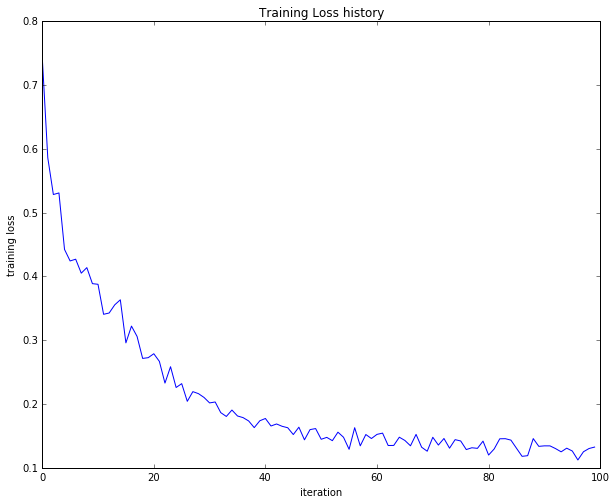

In [10]:
net = init_toy_model()
# print X
# print y
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=1e-5,
            num_iters=100, verbose=False)

print 'Final training loss: ', stats['loss_history'][-1]

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [93]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test




In [5]:
y = merged_df['outcome'].values
tmp = merged_df.drop(['people_id','activity_id','date_x','date_y','outcome'], 1)
X = tmp.values
print X.shape
#print X[3,:]
# print tmp.head(10)
X_train = X[0:1406266,:]
y_train = y[0:1406266]
X_val = X[1406266:1757833,:]
y_val = y[1406266:1757833]
X_test = X[1757833:2197291,:]
y_test = y[1757833:2197291]

# Invoke the above function to get our data.
# X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(490,10,10)
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

(2197291, 50)
Train data shape:  (1406266, 50)
Train labels shape:  (1406266,)
Validation data shape:  (351567, 50)
Validation labels shape:  (351567,)
Test data shape:  (439458, 50)
Test labels shape:  (439458,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [14]:
# input_size = 32 * 32 * 3
# hidden_size = 50
# num_classes = 10

input_size = 50
hidden_size = 30
num_classes = 2
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=40000, batch_size=200,
            learning_rate=0.000122574676049, learning_rate_decay=0.95,
            reg=0.000257796641079, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc



iteration 0 / 40000: loss 0.693173
iteration 100 / 40000: loss 0.677820
iteration 200 / 40000: loss 0.669449
iteration 300 / 40000: loss 0.656030
iteration 400 / 40000: loss 0.675461
iteration 500 / 40000: loss 0.680426
iteration 600 / 40000: loss 0.696262
iteration 700 / 40000: loss 0.672914
iteration 800 / 40000: loss 0.650694
iteration 900 / 40000: loss 0.680168
iteration 1000 / 40000: loss 0.691477
iteration 1100 / 40000: loss 0.676305
iteration 1200 / 40000: loss 0.666728
iteration 1300 / 40000: loss 0.691261
iteration 1400 / 40000: loss 0.668496
iteration 1500 / 40000: loss 0.654361
iteration 1600 / 40000: loss 0.667894
iteration 1700 / 40000: loss 0.672326
iteration 1800 / 40000: loss 0.692539
iteration 1900 / 40000: loss 0.664164
iteration 2000 / 40000: loss 0.659943
iteration 2100 / 40000: loss 0.676064
iteration 2200 / 40000: loss 0.675648
iteration 2300 / 40000: loss 0.679032
iteration 2400 / 40000: loss 0.659287
iteration 2500 / 40000: loss 0.674231
iteration 2600 / 40000: 

# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

In [18]:
activity_id = list(merged_test_df.activity_id)
test_dataset = merged_test_df.drop(['people_id','activity_id','date_x','date_y'], 1)
test_mat = np.array(test_dataset, dtype='int')
print test_mat.shape

(498687, 50)


In [19]:
ans = net.predict(test_mat)
print ans.shape

(498687,)


In [20]:
output_df = pd.DataFrame({'activity_id' : activity_id, 'outcome': ans})
output_df.head(5)

,activity_id,outcome
0,act1_249281,1
1,act2_230855,1
2,act1_240724,1
3,act1_83552,1
4,act2_1043301,1


In [22]:
output_df.sort(['activity_id','outcome']).to_csv('output_2NN.out', index=False)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


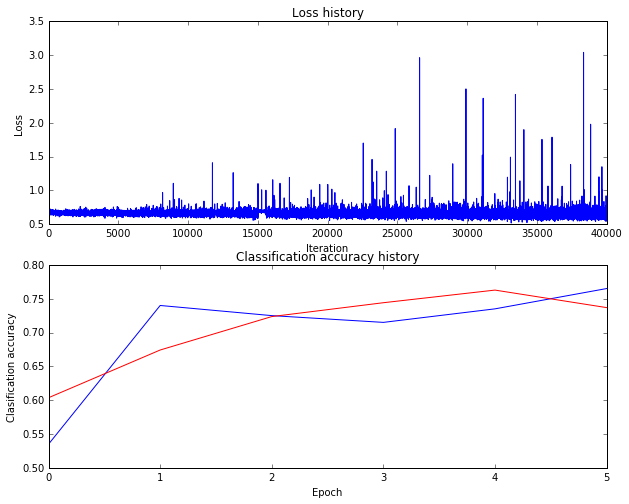

In [15]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train', color='blue')
plt.plot(stats['val_acc_history'], label='val', color='red')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

In [84]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
  W1 = net.params['W1']
  W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
  plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
  plt.gca().axis('off')
  plt.show()

show_net_weights(net)

ValueError: total size of new array must be unchanged

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [13]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
import datetime

# input_size = 32 * 32 * 3
# hidden_size = 100
# num_classes = 10
# max_count = 100

input_size = 50
hidden_size = 30
num_classes = 2
max_count = 100

net = TwoLayerNet(input_size, hidden_size, num_classes)
best_val = 0
best_reg = 0
best_lr = 0

for count in xrange(max_count):
    reg = 10**np.random.uniform(-5,1)
    lr = 10**np.random.uniform(-3,-4)    
    net_cur = net.train(X_train, y_train, X_val, y_val,
            num_iters=10000, batch_size=200,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
    val_acc = (net.predict(X_val) == y_val).mean()
    if val_acc > best_val:
        best_net = net_cur
        best_val = val_acc
        best_lr  = lr
        best_reg = reg
    print str(datetime.datetime.now())+' val_acc: '+str(val_acc)+'\tlr: '+str(lr)+'\treg: '+str(reg)+'\t'+str(count)+'/'+str(max_count)

print "best_reg: "+str(best_reg)
print "best_lr: "+str(best_lr)

#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

2016-08-12 11:22:28.938834 val_acc: 0.716620160595	lr: 0.000122574676049	reg: 0.000257796641079	0/100
2016-08-12 11:22:39.934928 val_acc: 0.632343194896	lr: 0.000224158476177	reg: 0.000557655839593	1/100
2016-08-12 11:22:50.251901 val_acc: 0.613925652863	lr: 0.000139536206552	reg: 0.00018945940003	2/100
2016-08-12 11:23:02.027637 val_acc: 0.625695813316	lr: 0.000682871192088	reg: 2.70580154327e-05	3/100
2016-08-12 11:23:12.083339 val_acc: 0.621824573979	lr: 0.000455818449597	reg: 0.000766888962908	4/100
2016-08-12 11:23:22.053200 val_acc: 0.610489607955	lr: 0.000331041148314	reg: 0.103990693092	5/100
2016-08-12 11:23:33.175227 val_acc: 0.614995150284	lr: 0.000732548512665	reg: 9.24054008291	6/100
2016-08-12 11:23:46.972642 val_acc: 0.623909525069	lr: 0.000990601701381	reg: 0.0605841418631	7/100
2016-08-12 11:24:00.459367 val_acc: 0.621227248291	lr: 0.00097241506152	reg: 0.000256972431957	8/100
2016-08-12 11:24:13.233307 val_acc: 0.629535764164	lr: 0.000626006291516	reg: 5.51949924912e-

KeyboardInterrupt: 

In [46]:
# visualize the weights of the best network
show_net_weights(best_net)

NameError: name 'show_net_weights' is not defined

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [47]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc

AttributeError: 'dict' object has no attribute 'predict'